In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import basics_library 

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos_multiple_panels
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
classif_plotter_crossval = nonlib.crossval_classification_visualizer
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 
import copy
import math

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

In [38]:
# import data
csvname = datapath + 'new_circle_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:] )

# import booster
mylib = nonlib.boost_lib3.stump_booster.Setup(x,y)

# choose normalizer
mylib.choose_normalizer(name = 'standard')

# choose normalizer
mylib.make_train_valid_split(train_portion = 0.66)

# choose cost|
mylib.choose_cost(name = 'softmax')

# choose optimizer
mylib.choose_optimizer('newtons_method',max_its=2)

# run boosting
mylib.boost(15)


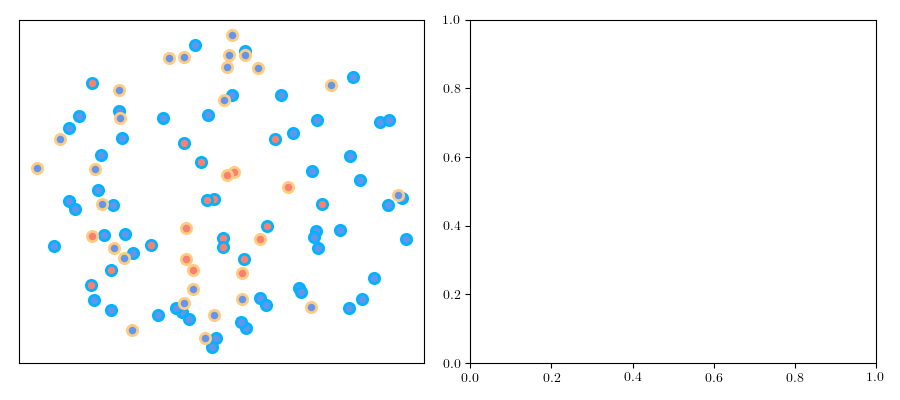
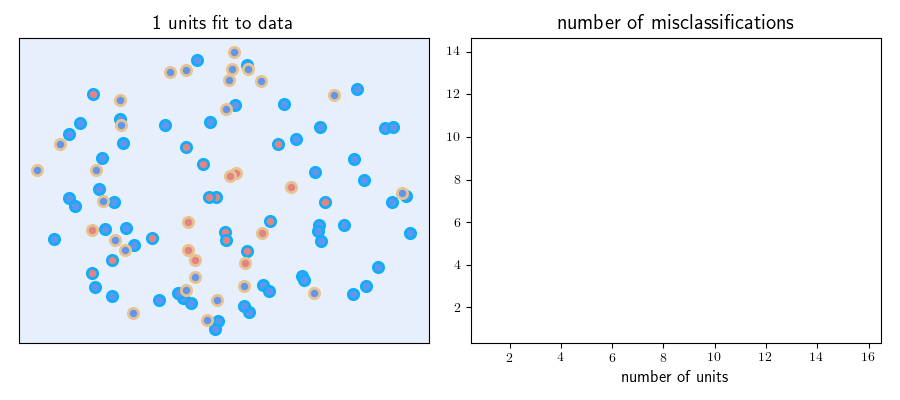
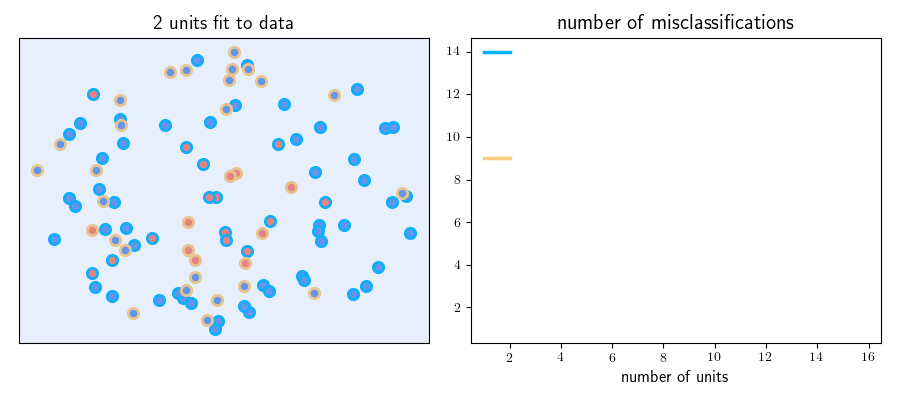
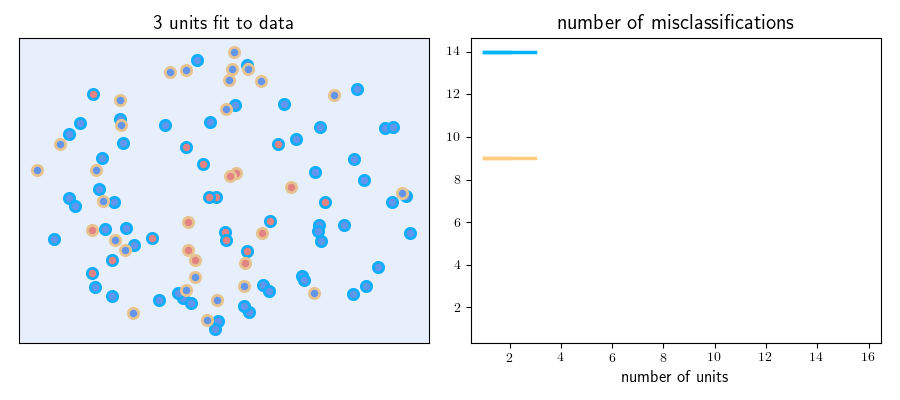
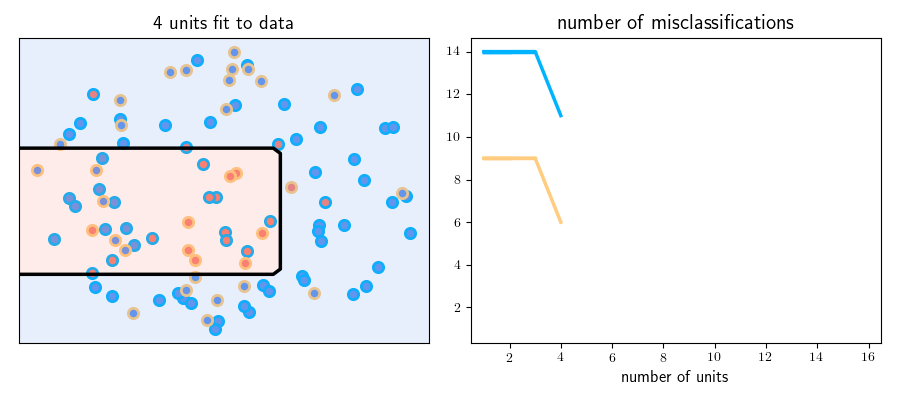
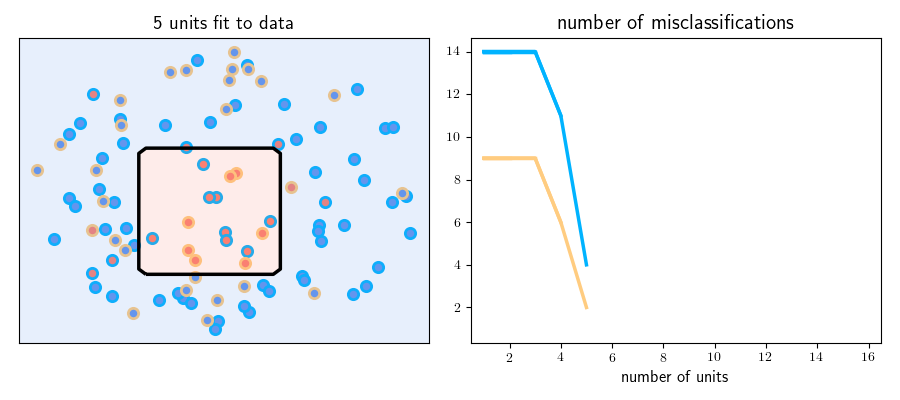
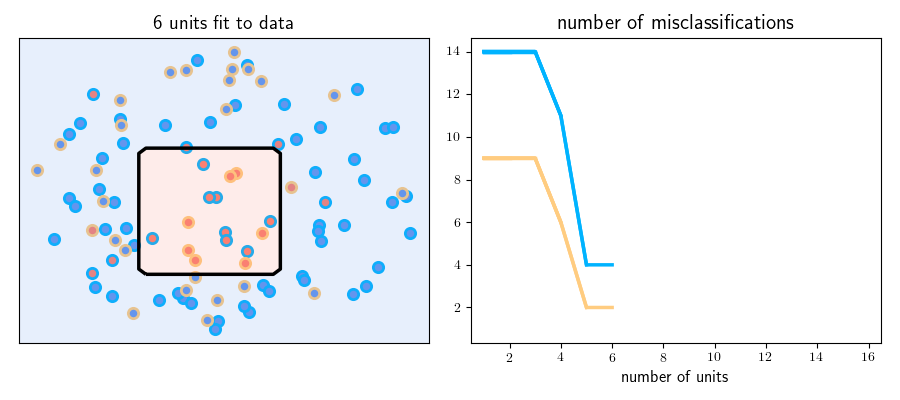
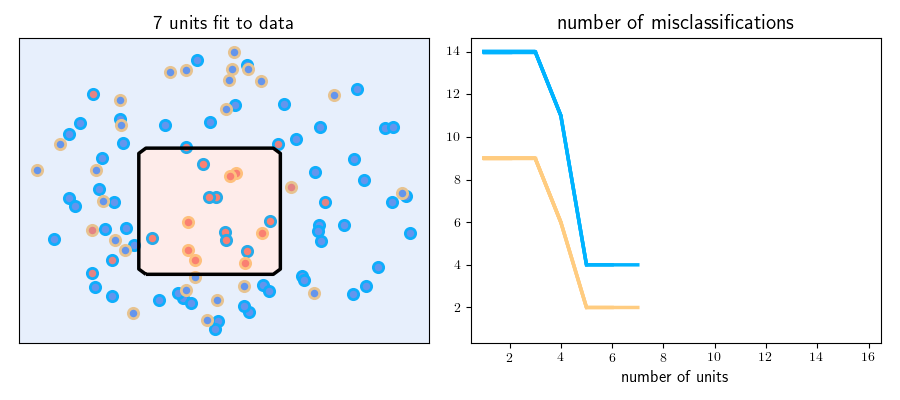
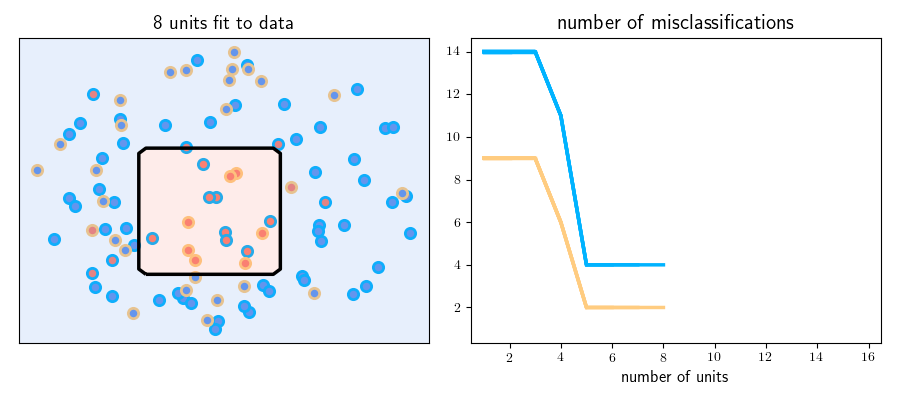
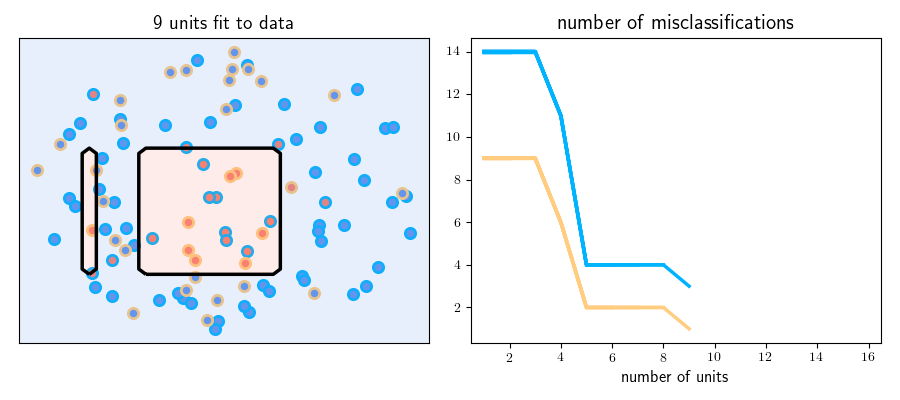
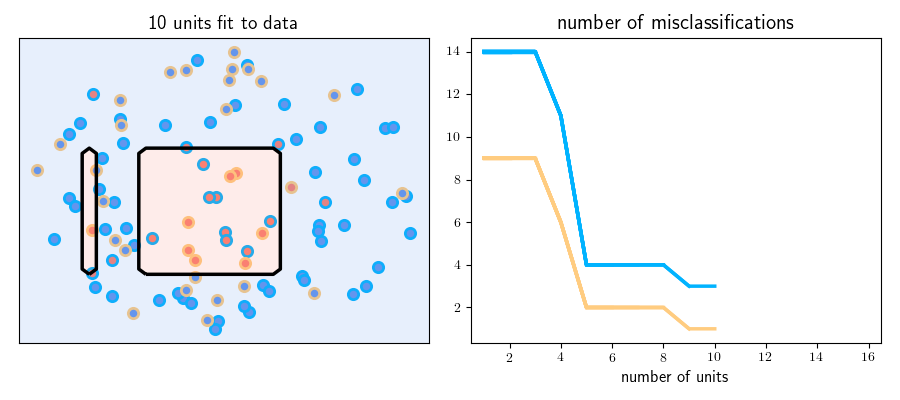
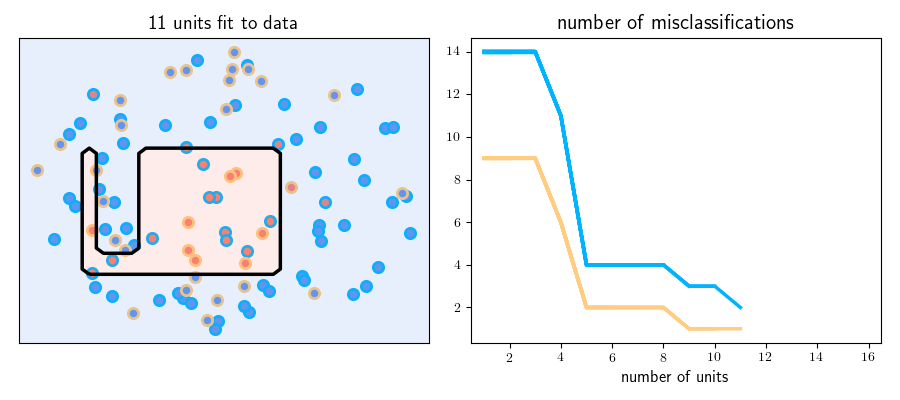
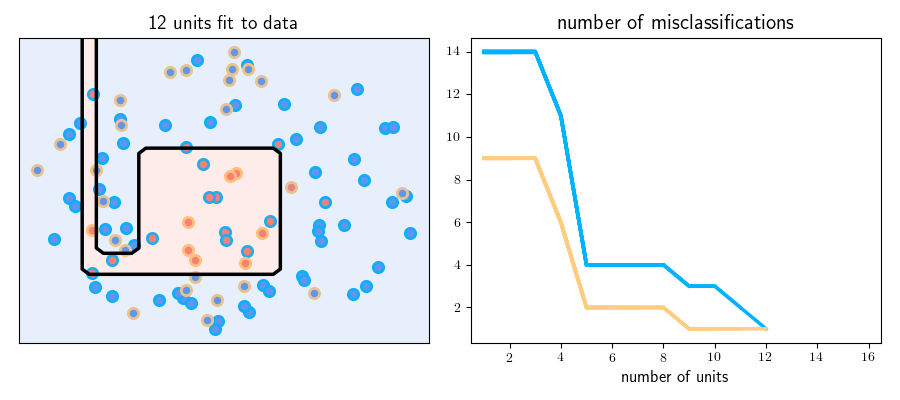
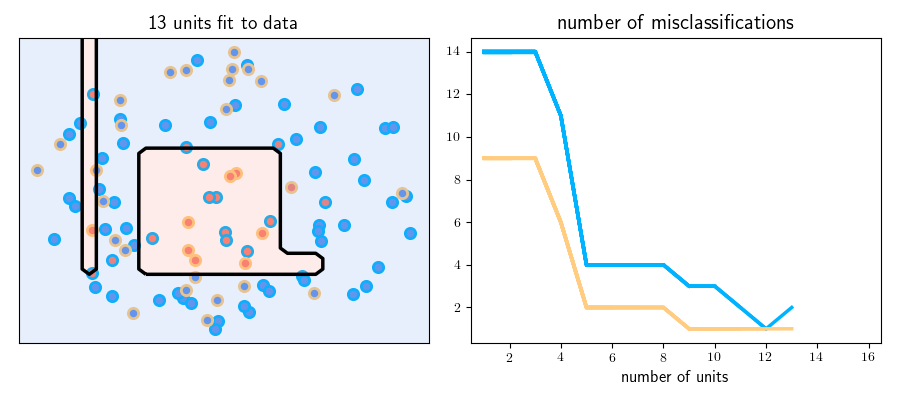
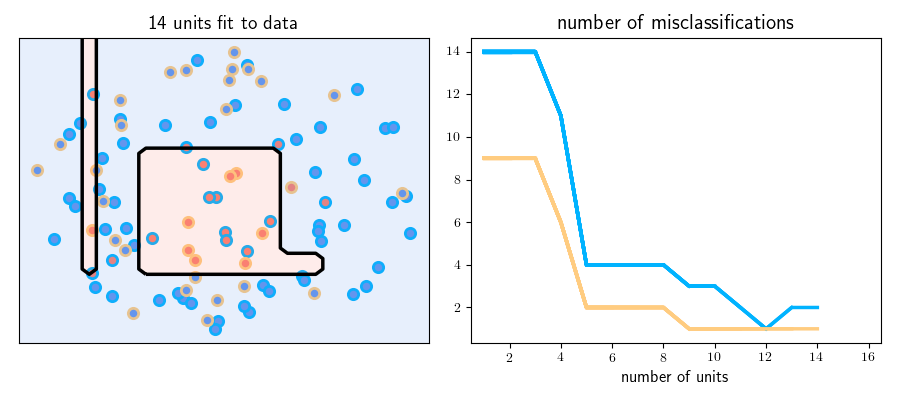
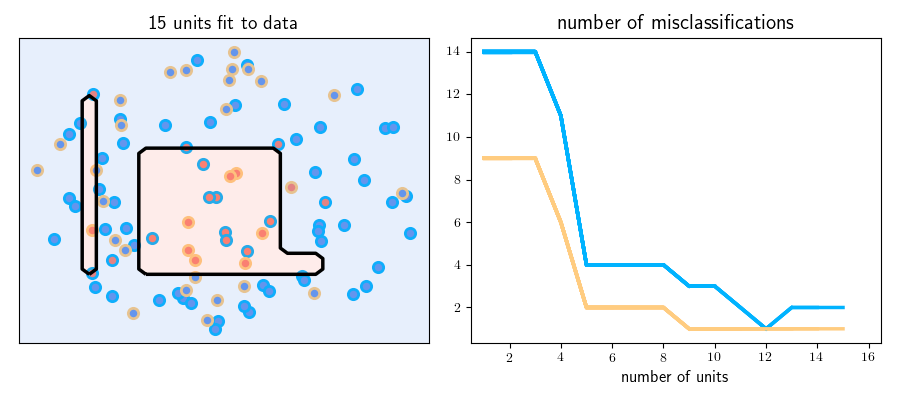

In [39]:
frames = 15
anim = nonlib.boosting_classification_animator_v2.Visualizer(csvname)
anim.animate_comparisons(mylib,frames)

In [40]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
csvname = datapath + '2_eggs.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# bags
num_baggs = 5

# start process
num_lams = 20
train_portion = 0.66
lambdas = np.linspace(0,0.1,num_lams)
runs1 = []
for t in range(num_baggs):
    print (t)
    
    # initialize with input/output data
    mylib1 = nonlib.reg_lib.super_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.preprocessing_steps(normalizer = 'standard')

    # make training validation split
    mylib1.make_train_val_split(train_portion = train_portion)
            
    # choose cost
    mylib1.choose_cost(name = 'softmax')
    
    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_features(name = 'polys',degree = 8)
        
    # loop over lambda choices
    w = 0
    for j in range(num_lams):
        lam = lambdas[j]
        
        # optimize
        mylib1.fit(algo = 'newtons_method',max_its = 1,verbose = False,lam = lam,epsilon = 10**(-7))
        
    # keep only the best degree, based on lowest validation cost
    val_costs = [np.min(mylib1.valid_count_histories[i]) for i in range(num_lams)]
    min_ind = np.argmin(val_costs)
    min_val = val_costs[min_ind]
    
    # get minor of minor
    smallest_ind = np.argmin(mylib1.valid_count_histories[min_ind])
    mylib1.train_cost_histories = mylib1.train_cost_histories[min_ind][smallest_ind]
    mylib1.valid_cost_histories = mylib1.valid_cost_histories[min_ind][smallest_ind]
    mylib1.train_count_histories = mylib1.train_count_histories[min_ind][smallest_ind]
    mylib1.valid_count_histories = mylib1.valid_count_histories[min_ind][smallest_ind]
    mylib1.weight_histories = mylib1.weight_histories[min_ind][smallest_ind]

    # store 
    runs1.append(copy.deepcopy(mylib1))

0
1
2
3
4


<IPython.core.display.Javascript object>


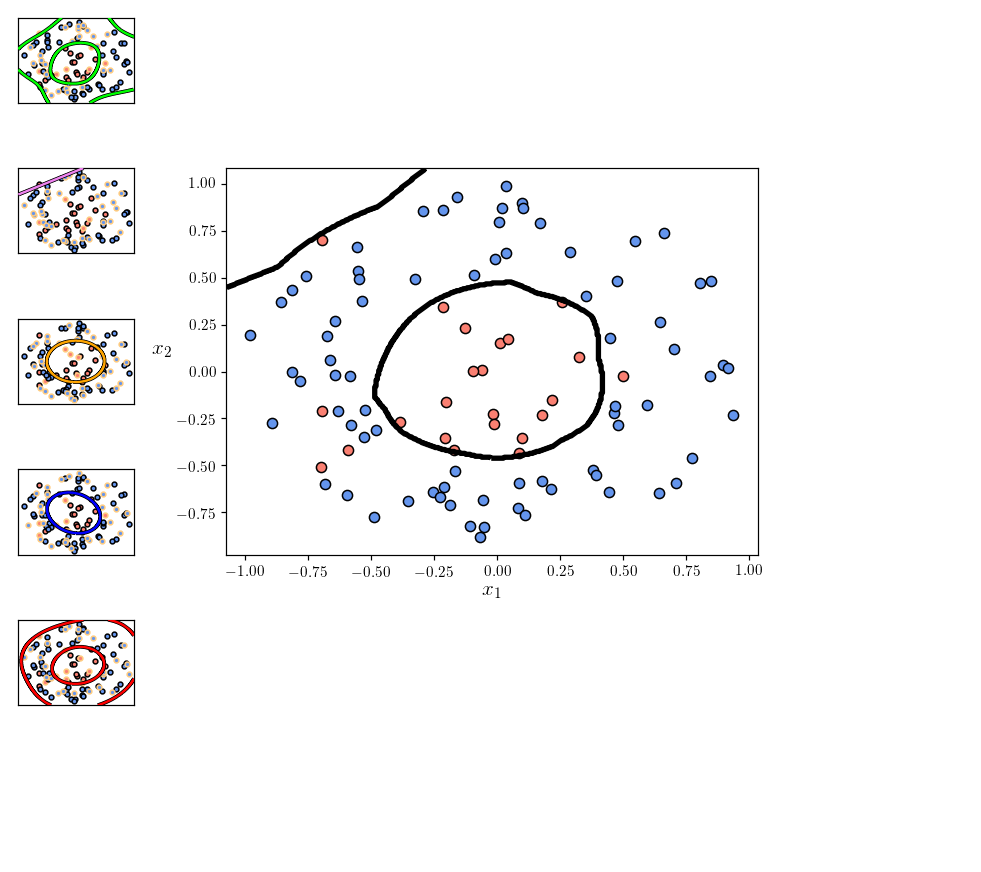

In [41]:
# draw pics
demo5 = nonlib.classification_bagging_visualizers_v2.Visualizer(csvname_3)
demo5.show_runs(best_models_4)

<IPython.core.display.Javascript object>


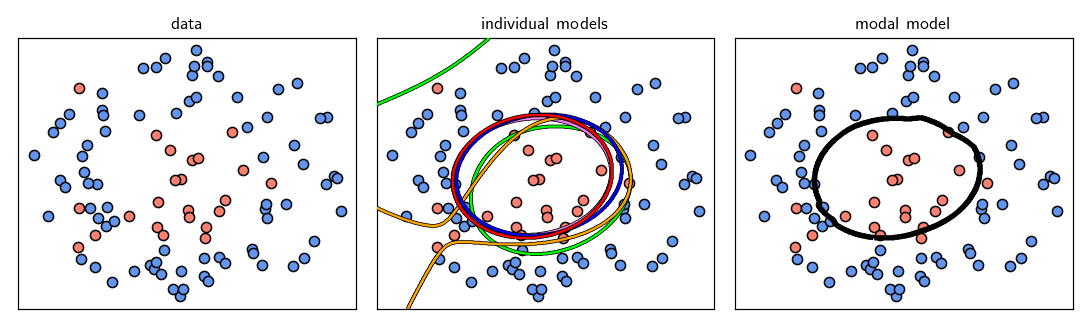

In [3]:
# draw pics
demo5 = nonlib.classification_bagging_visualizers_v2.Visualizer(csvname_3)
demo5.show_baggs(best_models_4)